# Open Science Demo

### Datasets

Datasets can be loaded using the following syntax
```
data = OpenScienceDataset('<short_name>')
```
This will load the data into an object with the attributes `data` (the data in a numpy array), `dates` (the dates the data is available for), `info` (brief information the data)

The available datasets and (their short names) are:

    - EOLIS monthly elevation change maps (eolis_dems)
    - ERA5 Mean sea level pressure (mean_sea_level_pressure)
    - ERA5 wind speed (10m_wind_speed)
    - GREP ocean salinity (sea_water_salinity)
    - GREP ocean potential temperature (sea_water_potential_temperature)
    - ENVEO monthly ice velocity (ice_flow)
    - Grounding line migration rates (grounding_line_migration_rates)
    - Ice shelf basal melt rate (ice_shelf_basal_melt_rate)

We focus on the Amundsen region with the extent: [-1905772.0, -1405772.0, -845000.0, -145000.0] with data focused between 2010 - 2021.

In [1]:
# Import modules 

from datetime import datetime
from ew_dta_science_case_demo.tools import OpenScienceDataset
import matplotlib.pyplot as plt

In [2]:
# Load the data

monthly_dems = OpenScienceDataset('eolis_dems')
grounding_line_migration_rates = OpenScienceDataset('grounding_line_migration_rates')
ice_shelf_basal_melt = OpenScienceDataset('ice_shelf_basal_melt_rate')

(<matplotlib.image.AxesImage at 0x7f0970950b20>, None)

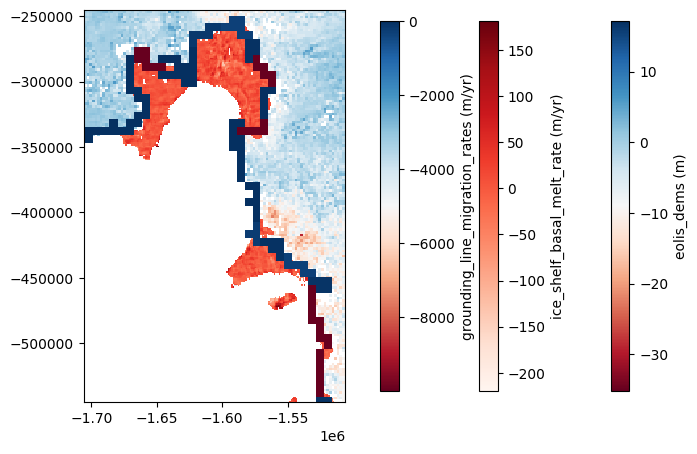

In [17]:
# Plot in 2D

# Provide minimum and maximum times to see change over the time period
min_time = datetime(2015, 6, 1)
max_time = datetime(2019, 1, 1)

# Extent to visulaise the data over
min_x=-1705772.0
max_x=-1505772.0
min_y=-545000.0
max_y=-245000.0

extent = [min_x, max_x, min_y, max_y]

fig, ax = plt.subplots(1, 1, figsize=(8, 12))

monthly_dems.plot2d(ax, extent, min_time, max_time, colourmap='RdBu', transparency=1)
ice_shelf_basal_melt.plot2d(ax, extent, min_time, max_time, colourmap='Reds', transparency=1)
grounding_line_migration_rates.plot2d(ax, extent, min_time, max_time, colourmap='RdBu', transparency=1)


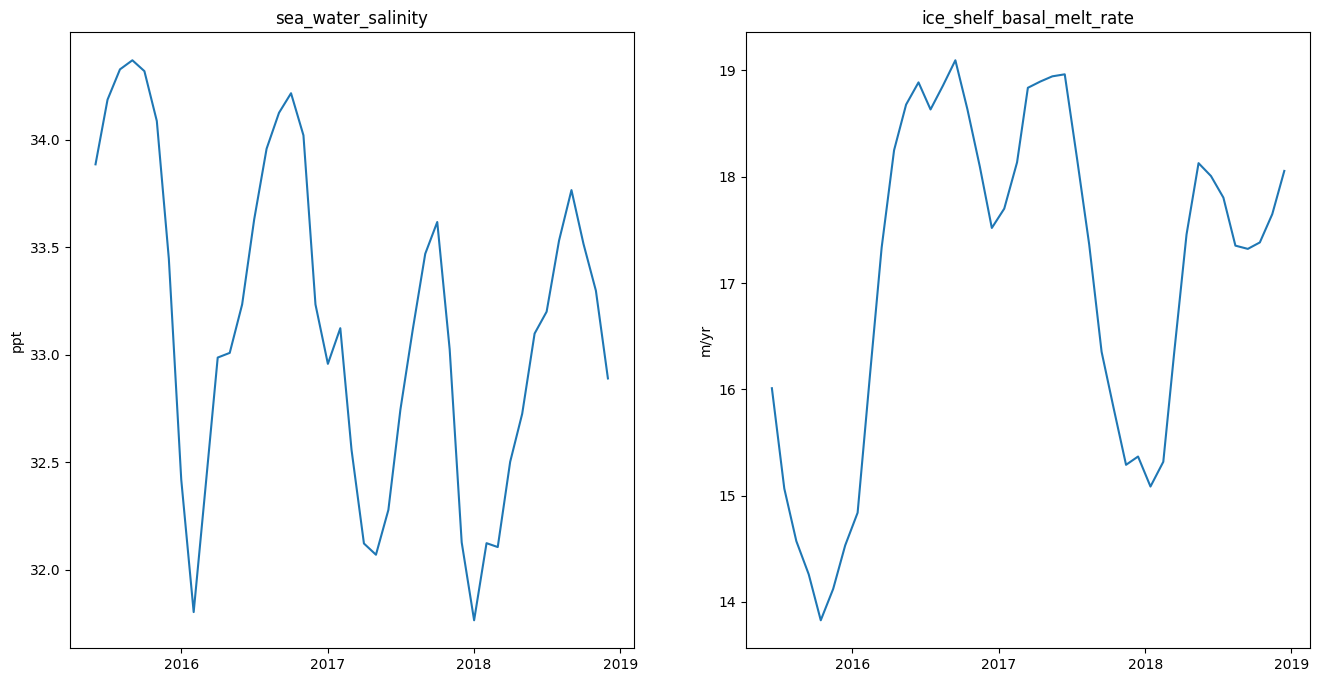

In [18]:
# Plot Time Series

sea_water_salinity = OpenScienceDataset('sea_water_salinity')

fig, ax = plt.subplots(1, 2, figsize=(16, 8))

sea_water_salinity.plot_time_series(ax[0], extent, min_time, max_time)
ice_shelf_basal_melt.plot_time_series(ax[1], extent, min_time, max_time)


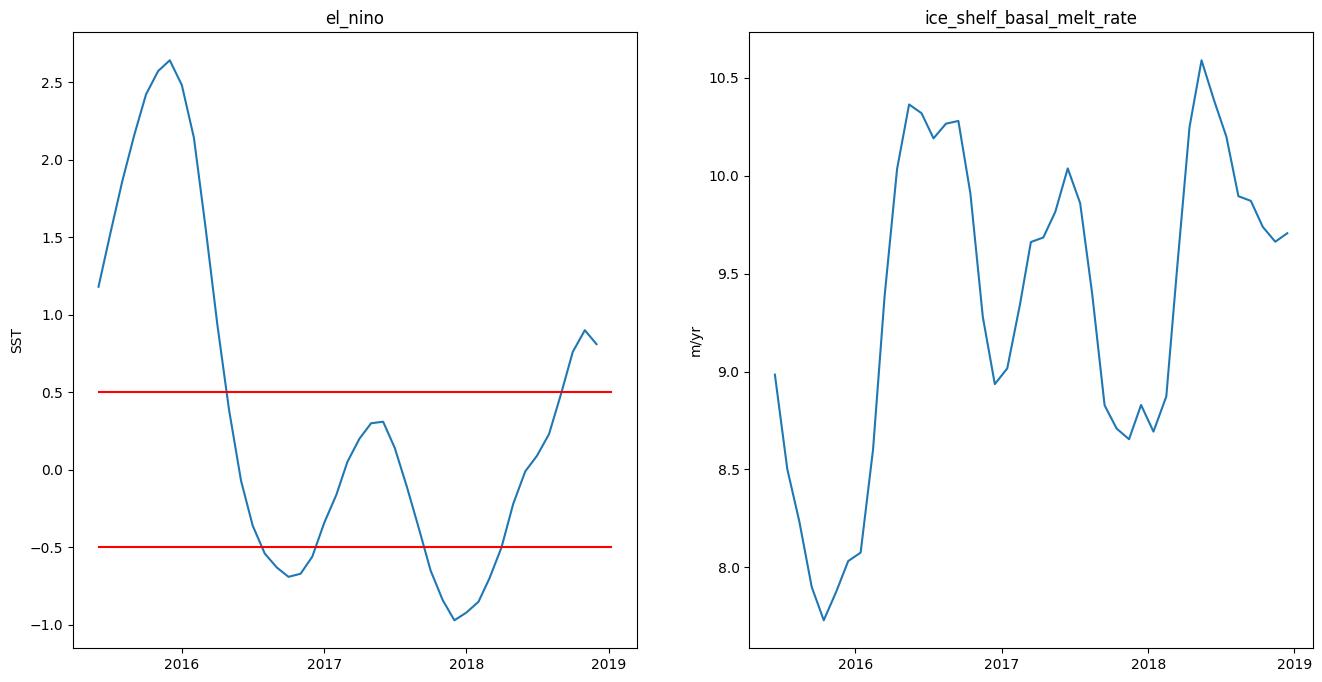

In [21]:
# El Nino

from datetime import datetime
from ew_dta_science_case_demo.tools import OpenScienceDataset
import matplotlib.pyplot as plt

min_time = datetime(2015, 6, 1)
max_time = datetime(2019, 1, 7)

min_x=-1905772.0
max_x=-1505772.0
min_y=-845000.0
max_y=-245000.0

extent = [min_x, max_x, min_y, max_y]

fig, ax = plt.subplots(1, 2, figsize=(16, 8))

el_nino = OpenScienceDataset('el_nino')
ice_shelf_basal_melt = OpenScienceDataset('ice_shelf_basal_melt_rate')

el_nino.plot_time_series(ax[0], None, min_time, max_time)
ice_shelf_basal_melt.plot_time_series(ax[1], extent, min_time, max_time)

# Anomalous sea surface temparutres are those outside the interval (-0.5, 0.5). We notice that there is a correlation
# between anolmalous SST and higher periods of ice shelf basal melt rate 
ax[0].plot([min_time, max_time], [0.5, 0.5], color='r')
ax[0].plot([min_time, max_time], [-0.5, -0.5], color='r')